# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
import csv
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities) 

637

## Perform API Calls

In [3]:
# URL for Open Weather Map API data pull
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# sample data to evaluate data structure
test_url = base_url + "&APPID=" + api_key + "&units=" + units + "&q=" + "richmond"
#print(test_url)
response = requests.get(test_url).json()
#pprint(response)
print(json.dumps(response, indent=2))
 

{
  "coord": {
    "lon": -123.14,
    "lat": 49.16
  },
  "weather": [
    {
      "id": 211,
      "main": "Thunderstorm",
      "description": "thunderstorm",
      "icon": "11d"
    },
    {
      "id": 521,
      "main": "Rain",
      "description": "shower rain",
      "icon": "09d"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 72.23,
    "pressure": 1017,
    "humidity": 57,
    "temp_min": 64,
    "temp_max": 77
  },
  "visibility": 48279,
  "wind": {
    "speed": 12.75,
    "deg": 200
  },
  "clouds": {
    "all": 20
  },
  "dt": 1563230031,
  "sys": {
    "type": 1,
    "id": 954,
    "message": 0.0092,
    "country": "CA",
    "sunrise": 1563193416,
    "sunset": 1563250381
  },
  "timezone": -25200,
  "id": 6122085,
  "name": "Richmond",
  "cod": 200
}


In [4]:
# setup api call and record processing loops

search_data = []
city_list = []
country_list = []

query_url = base_url + "&APPID=" + api_key + "&units=" + units + "&q="

count = 0
print("Begin API Call to OpenWeather Database")
print("---------------------------------------")


for city in cities:
    try:
        print(f"Processing record {count} for city: {city}")
        count += 1
        response = requests.get(query_url + city)
        city_json = response.json()
        country_abbrev = city_json['sys']['country']
        city_id = city_json['id']
        search_data.append(city_json)
        city_list.append(city)
        country_list.append(country_abbrev)
        print(f"Record found for city: {city}, country: {country_abbrev} with city id: {city_id}")
    except Exception as ex:
        print(f"No weather record found for city: {city}")
        pass

Begin API Call to OpenWeather Database
---------------------------------------
Processing record 0 for city: de-kastri
Record found for city: de-kastri, country: RU with city id: 2126018
Processing record 1 for city: cape town
Record found for city: cape town, country: ZA with city id: 3369157
Processing record 2 for city: cabo san lucas
Record found for city: cabo san lucas, country: MX with city id: 3985710
Processing record 3 for city: illoqqortoormiut
No weather record found for city: illoqqortoormiut
Processing record 4 for city: nikolskoye
Record found for city: nikolskoye, country: RU with city id: 546105
Processing record 5 for city: roma
Record found for city: roma, country: IT with city id: 6539761
Processing record 6 for city: longyearbyen
Record found for city: longyearbyen, country: NO with city id: 2729907
Processing record 7 for city: hobart
Record found for city: hobart, country: AU with city id: 2163355
Processing record 8 for city: mar del plata
Record found for city:

Record found for city: sao miguel do araguaia, country: BR with city id: 3448455
Processing record 80 for city: sao filipe
Record found for city: sao filipe, country: CV with city id: 3374210
Processing record 81 for city: bredasdorp
Record found for city: bredasdorp, country: ZA with city id: 1015776
Processing record 82 for city: hambantota
Record found for city: hambantota, country: LK with city id: 1244926
Processing record 83 for city: bowen
Record found for city: bowen, country: AU with city id: 2174444
Processing record 84 for city: rujiena
Record found for city: rujiena, country: LV with city id: 456008
Processing record 85 for city: georgetown
Record found for city: georgetown, country: GY with city id: 3378644
Processing record 86 for city: new norfolk
Record found for city: new norfolk, country: AU with city id: 2155415
Processing record 87 for city: lebu
Record found for city: lebu, country: ET with city id: 344979
Processing record 88 for city: port elizabeth
Record found 

Record found for city: barrow, country: AR with city id: 3833859
Processing record 158 for city: atuona
Record found for city: atuona, country: PF with city id: 4020109
Processing record 159 for city: bubaque
Record found for city: bubaque, country: GW with city id: 2374583
Processing record 160 for city: bethel
Record found for city: bethel, country: US with city id: 5880568
Processing record 161 for city: ostrovnoy
Record found for city: ostrovnoy, country: RU with city id: 556268
Processing record 162 for city: cockburn town
Record found for city: cockburn town, country: TC with city id: 3576994
Processing record 163 for city: korla
No weather record found for city: korla
Processing record 164 for city: kokopo
Record found for city: kokopo, country: PG with city id: 2093685
Processing record 165 for city: aklavik
Record found for city: aklavik, country: CA with city id: 5882953
Processing record 166 for city: mopipi
Record found for city: mopipi, country: BW with city id: 933288
Pro

Record found for city: russell, country: US with city id: 4278471
Processing record 236 for city: victoria
Record found for city: victoria, country: BN with city id: 1733782
Processing record 237 for city: gorontalo
Record found for city: gorontalo, country: ID with city id: 1643837
Processing record 238 for city: tazovskiy
Record found for city: tazovskiy, country: RU with city id: 1489853
Processing record 239 for city: saint-louis
Record found for city: saint-louis, country: SN with city id: 2246452
Processing record 240 for city: aitape
Record found for city: aitape, country: PG with city id: 2101169
Processing record 241 for city: asosa
Record found for city: asosa, country: ET with city id: 343292
Processing record 242 for city: kaputa
Record found for city: kaputa, country: ZM with city id: 176758
Processing record 243 for city: kavieng
Record found for city: kavieng, country: PG with city id: 2094342
Processing record 244 for city: ous
Record found for city: ous, country: RU wi

Record found for city: bambanglipuro, country: ID with city id: 1650434
Processing record 313 for city: bom jesus
Record found for city: bom jesus, country: BR with city id: 3405304
Processing record 314 for city: seoul
Record found for city: seoul, country: KR with city id: 1835848
Processing record 315 for city: paamiut
Record found for city: paamiut, country: GL with city id: 3421193
Processing record 316 for city: torbay
Record found for city: torbay, country: CA with city id: 6167817
Processing record 317 for city: apricena
Record found for city: apricena, country: IT with city id: 3182958
Processing record 318 for city: tautira
Record found for city: tautira, country: PF with city id: 4033557
Processing record 319 for city: sapao
No weather record found for city: sapao
Processing record 320 for city: kazalinsk
No weather record found for city: kazalinsk
Processing record 321 for city: kudahuvadhoo
Record found for city: kudahuvadhoo, country: MV with city id: 1337607
Processing r

Record found for city: arganil, country: PT with city id: 2742757
Processing record 392 for city: balimo
No weather record found for city: balimo
Processing record 393 for city: wattegama
Record found for city: wattegama, country: LK with city id: 1241622
Processing record 394 for city: santo augusto
Record found for city: santo augusto, country: BR with city id: 3449476
Processing record 395 for city: guaymas
Record found for city: guaymas, country: MX with city id: 4005143
Processing record 396 for city: balikpapan
Record found for city: balikpapan, country: ID with city id: 1650527
Processing record 397 for city: port hedland
Record found for city: port hedland, country: AU with city id: 2063042
Processing record 398 for city: alibag
Record found for city: alibag, country: IN with city id: 1279027
Processing record 399 for city: midland
Record found for city: midland, country: US with city id: 5526337
Processing record 400 for city: lolua
No weather record found for city: lolua
Proc

Record found for city: praia da vitoria, country: PT with city id: 3372760
Processing record 472 for city: harrismith
Record found for city: harrismith, country: ZA with city id: 997751
Processing record 473 for city: centralia
Record found for city: centralia, country: US with city id: 5789683
Processing record 474 for city: abu dhabi
Record found for city: abu dhabi, country: AE with city id: 292968
Processing record 475 for city: ust-kamchatsk
No weather record found for city: ust-kamchatsk
Processing record 476 for city: russkiy
Record found for city: russkiy, country: RU with city id: 553514
Processing record 477 for city: madang
Record found for city: madang, country: CN with city id: 7413703
Processing record 478 for city: hirara
Record found for city: hirara, country: JP with city id: 1862505
Processing record 479 for city: port blair
Record found for city: port blair, country: IN with city id: 1259385
Processing record 480 for city: kamenskoye
No weather record found for city:

Record found for city: angoram, country: PG with city id: 2100765
Processing record 552 for city: kindia
Record found for city: kindia, country: GN with city id: 2419533
Processing record 553 for city: pingliang
Record found for city: pingliang, country: CN with city id: 1798760
Processing record 554 for city: acari
Record found for city: acari, country: BR with city id: 3390864
Processing record 555 for city: las margaritas
Record found for city: las margaritas, country: MX with city id: 3524744
Processing record 556 for city: pangnirtung
Record found for city: pangnirtung, country: CA with city id: 6096551
Processing record 557 for city: warqla
No weather record found for city: warqla
Processing record 558 for city: koumac
Record found for city: koumac, country: NC with city id: 2140558
Processing record 559 for city: catamarca
No weather record found for city: catamarca
Processing record 560 for city: phayao
Record found for city: phayao, country: TH with city id: 1151426
Processing

Record found for city: bonavista, country: CA with city id: 5905393
Processing record 631 for city: kodino
Record found for city: kodino, country: RU with city id: 546742
Processing record 632 for city: fare
Record found for city: fare, country: PF with city id: 4034496
Processing record 633 for city: whitianga
Record found for city: whitianga, country: NZ with city id: 2179103
Processing record 634 for city: pemba
Record found for city: pemba, country: MZ with city id: 1028918
Processing record 635 for city: ekibastuz
Record found for city: ekibastuz, country: KZ with city id: 1524325
Processing record 636 for city: novoagansk
Record found for city: novoagansk, country: RU with city id: 1497210


In [5]:
len(search_data)

550

### Convert Raw Data into Data Frame
* Export City data into CSV
* Display the dataframe

In [7]:
# Get selected data gather from "search_data" list, created above
lat_list =  [data.get("coord").get("lat") for data in search_data]
lng_list = [data.get("coord").get("lon") for data in search_data]
temp_list = [data.get("main").get("temp") for data in search_data]
humid_list = [data.get("main").get("humidity") for data in search_data]
cloud_list =[data.get("clouds").get("all") for data in search_data]
wind_list = [data.get("wind").get("speed") for data in search_data]
 

In [8]:
# Setup df to hold city data
cities_df = pd.DataFrame({"City Name":city_list, 
                          "Country Code":country_list, 
                          "Latitude":lat_list, 
                          "Longitude":lng_list,
                          "Temp (F)":temp_list,
                          "Humidity (%)":humid_list,
                          "Cloudiness (%)":cloud_list,
                          "Wind Speed (mph)":wind_list})

cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
City Name           550 non-null object
Country Code        550 non-null object
Latitude            550 non-null float64
Longitude           550 non-null float64
Temp (F)            550 non-null float64
Humidity (%)        550 non-null int64
Cloudiness (%)      550 non-null int64
Wind Speed (mph)    550 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 34.5+ KB


In [10]:
# Export data frame to csv file

cities_df.to_csv(output_data_file)

In [11]:
cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,de-kastri,RU,51.48,140.77,55.31,98,100,5.17
1,cape town,ZA,-33.93,18.42,54.88,93,0,9.17
2,cabo san lucas,MX,22.89,-109.91,87.60,46,5,9.17
3,nikolskoye,RU,59.70,30.79,49.17,81,0,4.47
4,roma,IT,41.89,12.48,70.63,56,40,8.05


## Latitude vs Temperature Plot

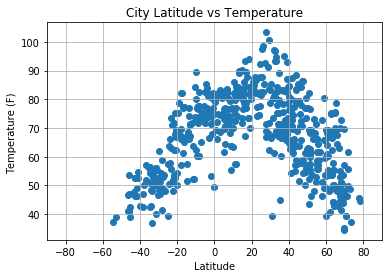

In [12]:
# Latitude vs Temperature
plt.scatter(cities_df["Latitude"], cities_df["Temp (F)"], marker="o")

# Add chart labels
plt.title("City Latitude vs Temperature")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Resources/Latitude-vs-Temperature.png")

# Show plot
plt.show() 

## Latitude vs. Humidity Plot

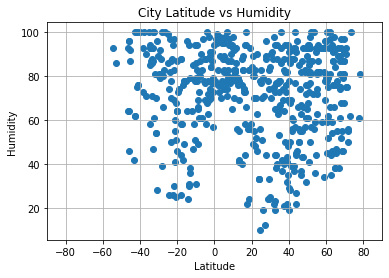

In [13]:
# Latitude vs Humidity
plt.scatter(cities_df["Latitude"], cities_df["Humidity (%)"], marker="o")

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Resources/Latitude-vs-Humidity.png")

# Show plot
plt.show()
 

## Latitude vs. Cloudiness Plot

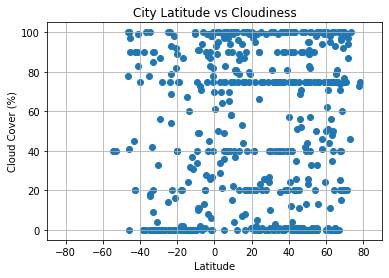

In [14]:
# Latitude vs Wind Speed
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness (%)"], marker="o")

# Add chart labels
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Resources/Latitude-vs-Cloudiness.png")

# Show plot
plt.show() 

## Latitude vs. Wind Speed Plot

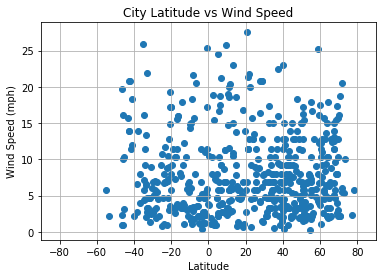

In [15]:
# Latitude vs Wind Speed
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed (mph)"], marker="o")

# Add chart labels
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Resources/Latitude-vs-WindSpeed.png")

# Show plot
plt.show()

 

In [16]:
# export DF to HTML
cities_table = cities_df.to_html(buf=None, columns=None, col_space=None, header=True, index=True, na_rep='NaN', formatters=None, float_format=None, sparsify=None, index_names=True, justify=None, bold_rows=True, classes=None, escape=True, max_rows=None, max_cols=None, show_dimensions=False, notebook=False)
cities_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>City Name</th>\n      <th>Country Code</th>\n      <th>Latitude</th>\n      <th>Longitude</th>\n      <th>Temp (F)</th>\n      <th>Humidity (%)</th>\n      <th>Cloudiness (%)</th>\n      <th>Wind Speed (mph)</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>de-kastri</td>\n      <td>RU</td>\n      <td>51.48</td>\n      <td>140.77</td>\n      <td>55.31</td>\n      <td>98</td>\n      <td>100</td>\n      <td>5.17</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>cape town</td>\n      <td>ZA</td>\n      <td>-33.93</td>\n      <td>18.42</td>\n      <td>54.88</td>\n      <td>93</td>\n      <td>0</td>\n      <td>9.17</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>cabo san lucas</td>\n      <td>MX</td>\n      <td>22.89</td>\n      <td>-109.91</td>\n      <td>87.60</td>\n      <td>46</td>\n      <td>5</td>\n      <td>9.17</td>\n    </tr>\n   